In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from shapely.wkt import loads
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [18]:
mlink = pd.read_csv('./data/gdf_s010_p010_v010.csv')
link = pd.read_csv('./data/linknode.csv')

In [19]:
#The highway=tertiary tag is used for roads connecting smaller settlements, 
#and within large settlements for roads connecting local centres. 
#In terms of the transportation network, OpenStreetMap "tertiary" roads commonly also connect minor streets to more major roads.

In [20]:
mlink

,mlink,Sub-Area_Name,Route_No,Route_Name,Peak,Direction,Road_Number,Road_Name,Road_Section,Link_Element_List,...,from_node,to_node,Link_Type,NPI_Link_ID,SCATS_Link_Name,Notes,IRIS_PolyLine,polyline,Start_Point,End_Point
0,76,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"143(L), 8-10(L)",...,155489,4481,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.846262 -31.962077, 115.8...","LINESTRING (115.846262 -31.962077, 115.846228 ...","(115.846262, -31.962077)","(115.821391, -31.9752)"
1,77,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,11(L),...,4481,67701,Art,NaN,NaN,NaN,"LINESTRING (115.821391 -31.9752, 115.819841 -3...","LINESTRING (115.821391 -31.9752, 115.819841 -3...","(115.821391, -31.9752)","(115.817964, -31.97572)"
2,78,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,12-13(L),...,67701,4104,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.817964 -31.97572, 115.81...","LINESTRING (115.817964 -31.97572, 115.81759 -3...","(115.817964, -31.97572)","(115.813906, -31.977303)"
3,79,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"14-15(L),17-28 (S)",...,4104,13992,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.813906 -31.977303, 115.8...","LINESTRING (115.813906 -31.977303, 115.813766 ...","(115.813906, -31.977303)","(115.802612, -31.979307)"
4,80,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,29-45(S),...,13992,4485,Art,NaN,NaN,NaN,"LINESTRING (115.802612 -31.979307, 115.802048 ...","LINESTRING (115.802612 -31.979307, 115.802048 ...","(115.802612, -31.979307)","(115.791358, -31.981308)"
5,81,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"46-48(S), 131-132(S), 50-53(S)",...,4485,13901,Art,NaN,NaN,NaN,"LINESTRING (115.791358 -31.981308, 115.79045 -...","LINESTRING (115.791358 -31.981308, 115.79045 -...","(115.791358, -31.981308)","(115.782911, -31.982714)"
6,82,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,54(S),...,13901,4316,Art,NaN,NaN,NaN,"LINESTRING (115.782911 -31.982714, 115.782578 ...","LINESTRING (115.782911 -31.982714, 115.782578 ...","(115.782911, -31.982714)","(115.781367, -31.983119)"
7,83,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,55-58(S),...,4316,4487,Art,NaN,NaN,NaN,"LINESTRING (115.781367 -31.983119, 115.780573 ...","LINESTRING (115.781367 -31.983119, 115.780573 ...","(115.781367, -31.983119)","(115.777991, -31.98427)"
8,84,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,59-68(S),...,4487,13842,Art,NaN,NaN,NaN,"LINESTRING (115.777991 -31.98427, 115.777595 -...","LINESTRING (115.777991 -31.98427, 115.777595 -...","(115.777991, -31.98427)","(115.768153, -31.989807)"
9,85,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,69-79(S),...,13842,13812,Art,NaN,NaN,NaN,"LINESTRING (115.768153 -31.989807, 115.767995 ...","LINESTRING (115.768153 -31.989807, 115.767995 ...","(115.768153, -31.989807)","(115.762895, -31.997924)"


In [21]:
def parsePointX(pstr):
    xy = pstr.strip('(').strip(')').split(',')
    return float(xy[0])

def parsePointY(pstr):
    xy = pstr.strip('(').strip(')').split(',')
    return float(xy[1])
parsePointX('(115.821391, -31.9752)'), parsePointY('(115.821391, -31.9752)')

(115.821391, -31.9752)

In [22]:
def parsePolyline(polylinestr):
    return loads(polylinestr)

In [23]:
mlink['polyline'] = mlink['polyline'].map(parsePolyline)

In [24]:
# mlink['x0'] = mlink['Start_Point'].map(parsePointX)
# mlink['y0'] = mlink['Start_Point'].map(parsePointY)
# mlink['x1'] = mlink['End_Point'].map(parsePointX)
# mlink['y1'] = mlink['End_Point'].map(parsePointY)

In [25]:
mlink

,mlink,Sub-Area_Name,Route_No,Route_Name,Peak,Direction,Road_Number,Road_Name,Road_Section,Link_Element_List,...,from_node,to_node,Link_Type,NPI_Link_ID,SCATS_Link_Name,Notes,IRIS_PolyLine,polyline,Start_Point,End_Point
0,76,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"143(L), 8-10(L)",...,155489,4481,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.846262 -31.962077, 115.8...","LINESTRING (115.846262 -31.962077, 115.846228 ...","(115.846262, -31.962077)","(115.821391, -31.9752)"
1,77,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,11(L),...,4481,67701,Art,NaN,NaN,NaN,"LINESTRING (115.821391 -31.9752, 115.819841 -3...","LINESTRING (115.821391 -31.9752, 115.819841 -3...","(115.821391, -31.9752)","(115.817964, -31.97572)"
2,78,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,12-13(L),...,67701,4104,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.817964 -31.97572, 115.81...","LINESTRING (115.817964 -31.97572, 115.81759 -3...","(115.817964, -31.97572)","(115.813906, -31.977303)"
3,79,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"14-15(L),17-28 (S)",...,4104,13992,Art,NaN,NaN,NaN,"MULTILINESTRING ((115.813906 -31.977303, 115.8...","LINESTRING (115.813906 -31.977303, 115.813766 ...","(115.813906, -31.977303)","(115.802612, -31.979307)"
4,80,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,29-45(S),...,13992,4485,Art,NaN,NaN,NaN,"LINESTRING (115.802612 -31.979307, 115.802048 ...","LINESTRING (115.802612 -31.979307, 115.802048 ...","(115.802612, -31.979307)","(115.791358, -31.981308)"
5,81,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,"46-48(S), 131-132(S), 50-53(S)",...,4485,13901,Art,NaN,NaN,NaN,"LINESTRING (115.791358 -31.981308, 115.79045 -...","LINESTRING (115.791358 -31.981308, 115.79045 -...","(115.791358, -31.981308)","(115.782911, -31.982714)"
6,82,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,54(S),...,13901,4316,Art,NaN,NaN,NaN,"LINESTRING (115.782911 -31.982714, 115.782578 ...","LINESTRING (115.782911 -31.982714, 115.782578 ...","(115.782911, -31.982714)","(115.781367, -31.983119)"
7,83,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,55-58(S),...,4316,4487,Art,NaN,NaN,NaN,"LINESTRING (115.781367 -31.983119, 115.780573 ...","LINESTRING (115.781367 -31.983119, 115.780573 ...","(115.781367, -31.983119)","(115.777991, -31.98427)"
8,84,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,59-68(S),...,4487,13842,Art,NaN,NaN,NaN,"LINESTRING (115.777991 -31.98427, 115.777595 -...","LINESTRING (115.777991 -31.98427, 115.777595 -...","(115.777991, -31.98427)","(115.768153, -31.989807)"
9,85,North West,1,Stirling Hwy,Outbound,Westbound,H014,Stirling Hwy,Tydeman Rd to Mounts Bay Rd,69-79(S),...,13842,13812,Art,NaN,NaN,NaN,"LINESTRING (115.768153 -31.989807, 115.767995 ...","LINESTRING (115.768153 -31.989807, 115.767995 ...","(115.768153, -31.989807)","(115.762895, -31.997924)"


In [26]:
Point(115.846262, -31.962077).distance(mlink.at[1,'polyline'])

0.02812080670961493

In [27]:
link

,id,from,to,length,freespeed,capacity,permlanes,oneway,modes,origid,type,x0,y0,x1,y1
0,1,1837981604,2475108950,0.000617,16.666667,2000.0,2.0,1,car,240717393,secondary,115.904498,-32.053784,115.904509,-32.054400
1,10,2497393682,2962342207,0.000933,16.666667,3000.0,2.0,1,car,240717385,primary,115.872996,-32.044473,115.872839,-32.043566
2,100,271861586,271861591,0.002025,6.944444,600.0,1.0,1,car,666118028,tertiary,115.762757,-32.300474,115.763844,-32.302046
3,1000,31788631,271842260,0.000275,22.222222,4000.0,2.0,1,car,555951384,trunk,115.755426,-32.268412,115.755633,-32.268593
4,10000,314504132,6216310611,0.000125,6.944444,600.0,1.0,1,car,664144664,tertiary,115.766961,-31.939797,115.766971,-31.939921
5,10001,1054227344,5482420871,0.000132,6.944444,600.0,1.0,1,car,663096086,tertiary,115.861208,-32.180474,115.861253,-32.180350
6,10002,5482420871,1054227348,0.000128,6.944444,600.0,1.0,1,car,663096086,tertiary,115.861253,-32.180350,115.861294,-32.180471
7,10003,6224789042,25611606,0.003072,6.944444,600.0,1.0,1,car,25373970,tertiary,115.758511,-31.832425,115.758602,-31.835473
8,10004,25611606,6224789042,0.003072,6.944444,600.0,1.0,1,car,25373970,tertiary,115.758602,-31.835473,115.758511,-31.832425
9,10005,1054227358,5482420868,0.000160,16.666667,600.0,1.0,1,car,663096087,tertiary,115.861304,-32.180612,115.861251,-32.180763


In [28]:
link.type.value_counts()

tertiary          21950
secondary         10919
primary           10562
trunk              5431
unclassified       5383
motorway_link      1524
primary_link        957
trunk_link          927
motorway            810
tertiary_link       357
secondary_link      298
Name: type, dtype: int64

In [29]:
link = link[(link['type'] == 'motorway') | (link['type'] == 'trunk') | (link['type'] == 'primary')].reset_index()

In [30]:
link

,index,id,from,to,length,freespeed,capacity,permlanes,oneway,modes,origid,type,x0,y0,x1,y1
0,1,10,2497393682,2962342207,0.000933,16.666667,3000.0,2.0,1,car,240717385,primary,115.872996,-32.044473,115.872839,-32.043566
1,3,1000,31788631,271842260,0.000275,22.222222,4000.0,2.0,1,car,555951384,trunk,115.755426,-32.268412,115.755633,-32.268593
2,14,1001,271842260,271842261,0.001006,22.222222,4000.0,2.0,1,car,555951384,trunk,115.755633,-32.268593,115.756374,-32.269267
3,64,10055,1868692228,960028187,0.001311,16.666667,4000.0,2.0,1,car,571412147,trunk,115.968909,-31.899278,115.970220,-31.899268
4,71,10061,1697789916,31003504,0.000841,22.222222,3000.0,2.0,1,car,46870047,primary,115.845475,-31.909727,115.845630,-31.910553
5,72,10062,31036857,60747818,0.002106,16.666667,1500.0,1.0,1,car,46870046,primary,115.844287,-31.914502,115.844260,-31.916608
6,73,10063,60747818,31036857,0.002106,16.666667,1500.0,1.0,1,car,46870046,primary,115.844260,-31.916608,115.844287,-31.914502
7,74,10064,60747818,6246959170,0.005159,16.666667,1500.0,1.0,1,car,46870046,primary,115.844260,-31.916608,115.845424,-31.921561
8,75,10065,6246959170,60747818,0.005159,16.666667,1500.0,1.0,1,car,46870046,primary,115.845424,-31.921561,115.844260,-31.916608
9,99,10089,6140173464,6141468949,0.000617,16.666667,1500.0,1.0,1,car,46870048,primary,115.844716,-31.913305,115.845037,-31.912779


In [31]:

for idx, row in tqdm_notebook(link.iterrows()):
    miniMlink = -1
    miniDistance = 999999
    for midx in mlink.index:
        pl = mlink.at[midx, 'polyline']
        mid = mlink.at[midx, 'mlink']
        dsum = Point(row['x0'], row['y0']).distance(pl) + Point(row['x1'], row['y1']).distance(pl)
        if dsum < miniDistance:
            miniMlink = mid
            miniDistance = dsum
    link.at[idx, 'pairedMlink'] = miniMlink
    link.at[idx,'distanceSum'] = miniDistance
    
link['pairedMlink'] = link.pairedMlink.astype(int)
link.to_csv('./data/mlinks_links_connected_total.csv',index=False)

In [32]:
link

,index,id,from,to,length,freespeed,capacity,permlanes,oneway,modes,origid,type,x0,y0,x1,y1,pairedMlink,distanceSum
0,1,10,2497393682,2962342207,0.000933,16.666667,3000.0,2.0,1,car,240717385,primary,115.872996,-32.044473,115.872839,-32.043566,532,0.002926
1,3,1000,31788631,271842260,0.000275,22.222222,4000.0,2.0,1,car,555951384,trunk,115.755426,-32.268412,115.755633,-32.268593,604,0.000117
2,14,1001,271842260,271842261,0.001006,22.222222,4000.0,2.0,1,car,555951384,trunk,115.755633,-32.268593,115.756374,-32.269267,604,0.000053
3,64,10055,1868692228,960028187,0.001311,16.666667,4000.0,2.0,1,car,571412147,trunk,115.968909,-31.899278,115.970220,-31.899268,807,0.000417
4,71,10061,1697789916,31003504,0.000841,22.222222,3000.0,2.0,1,car,46870047,primary,115.845475,-31.909727,115.845630,-31.910553,321,0.000311
5,72,10062,31036857,60747818,0.002106,16.666667,1500.0,1.0,1,car,46870046,primary,115.844287,-31.914502,115.844260,-31.916608,258,0.006984
6,73,10063,60747818,31036857,0.002106,16.666667,1500.0,1.0,1,car,46870046,primary,115.844260,-31.916608,115.844287,-31.914502,258,0.006984
7,74,10064,60747818,6246959170,0.005159,16.666667,1500.0,1.0,1,car,46870046,primary,115.844260,-31.916608,115.845424,-31.921561,258,0.008420
8,75,10065,6246959170,60747818,0.005159,16.666667,1500.0,1.0,1,car,46870046,primary,115.845424,-31.921561,115.844260,-31.916608,258,0.008420
9,99,10089,6140173464,6141468949,0.000617,16.666667,1500.0,1.0,1,car,46870048,primary,115.844716,-31.913305,115.845037,-31.912779,260,0.003973


(array([7.206e+03, 1.186e+03, 1.106e+03, 1.079e+03, 8.160e+02, 6.160e+02,
        5.040e+02, 4.970e+02, 6.040e+02, 4.100e+02, 3.010e+02, 2.210e+02,
        2.050e+02, 1.710e+02, 1.940e+02, 1.690e+02, 1.430e+02, 1.740e+02,
        7.700e+01, 8.500e+01, 8.100e+01, 3.800e+01, 3.900e+01, 6.900e+01,
        7.800e+01, 4.300e+01, 2.000e+01, 1.000e+01, 3.700e+01, 1.600e+01,
        2.900e+01, 2.400e+01, 4.100e+01, 4.200e+01, 2.300e+01, 1.800e+01,
        1.000e+01, 8.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 2.000e+00,
        6.000e+00, 3.600e+01, 6.000e+00, 6.000e+00, 1.100e+01, 8.000e+00,
        1.400e+01, 1.500e+01, 7.000e+00, 6.000e+00, 6.000e+00, 1.100e+01,
        6.000e+00, 3.000e+00, 2.900e+01, 4.000e+00, 7.000e+00, 6.000e+00,
        1.100e+01, 1.200e+01, 7.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+0

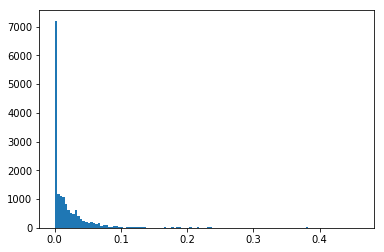

In [33]:
plt.hist(link['distanceSum'],bins = 120)

In [41]:
np.sum(link['distanceSum']<0.001)

6179

(array([7.206e+03, 1.186e+03, 1.106e+03, 1.079e+03, 8.160e+02, 6.160e+02,
        5.040e+02, 4.970e+02, 6.040e+02, 4.100e+02, 3.010e+02, 2.210e+02,
        2.050e+02, 1.710e+02, 1.940e+02, 1.690e+02, 1.430e+02, 1.740e+02,
        7.700e+01, 8.500e+01, 8.100e+01, 3.800e+01, 3.900e+01, 6.900e+01,
        7.800e+01, 4.300e+01, 2.000e+01, 1.000e+01, 3.700e+01, 1.600e+01,
        2.900e+01, 2.400e+01, 4.100e+01, 4.200e+01, 2.300e+01, 1.800e+01,
        1.000e+01, 8.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 2.000e+00,
        6.000e+00, 3.600e+01, 6.000e+00, 6.000e+00, 1.100e+01, 8.000e+00,
        1.400e+01, 1.500e+01, 7.000e+00, 6.000e+00, 6.000e+00, 1.100e+01,
        6.000e+00, 3.000e+00, 2.900e+01, 4.000e+00, 7.000e+00, 6.000e+00,
        1.100e+01, 1.200e+01, 7.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+0

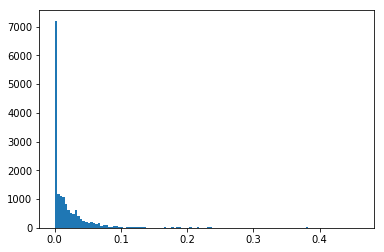

In [35]:
plt.hist(link['distanceSum'],bins = 120)